***
**Algorithmes d'optimisation -- L3 MINT et doubles licences 2019/2020 -- Université Paris-Sud**
***

$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\|#1\|}
\newcommand{\abs}[1]{|#1|}
\newcommand{\eps}{\varepsilon}
\newcommand{\sca}[2]{\langle#1|#2\rangle}
\newcommand{\D}{\mathrm{D}}
\newcommand{\hdots}{\dots}
\newcommand{\cond}{\mathrm{cond}}$

# TP 5: Projection sur un polyèdre et application en débruitage

Dans ce TP, on cherche à appliquer l'algorithme d'Uzawa au calcul de la projection d'un point $p\in \Rsp^d$ sur un polyèdre $K$, c'est-à-dire un ensemble convexe défini par un nombre fini d'inégalités affines:

$$ K = \{ x\in \Rsp^d \mid \forall 1\leq i\leq k, c_i(x) \leq 0 \} $$

où $c_i(x) := \sca{a_i}{x} - b_i \leq 0$. 
Dans la suite, on note $x\leq y$ où $x,y$ sont deux vecteurs si $\forall i, x_i\leq y_i$. En posant $A$ la 
matrice possédant $k$ lignes notées $a_1,\hdots,a_k \in \Rsp^d$ et $b\in\Rsp^k$, on a donc

$$ K = \{ x \in \Rsp^d\mid Ax \leq b\} $$


## Partie I: Étude et mise en oeuvre de l'algorithme d'Uzawa

Dans cette première partie, on donne un algorithme permettant de calculer la projection d'un point $p \in \Rsp^d$ sur le polyèdre $K$:

$$ (P) := \min_{x\in K} \frac{1}{2} \nr{x - p}^2 $$

Le lagrangien $L$ du problème (P) est donné par

$$L: (x,\lambda)\in\Rsp^d\times \Rsp^k_+ \mapsto f(x) + \sum_{1\leq i\leq k} \lambda_i c_i(x)$$

où $f(x) = \frac{1}{2} \nr{x - p}^2$, et le problème dual associé à (P) est donc

$$ (D) := \max_{\lambda \in \Rsp^k_+} \min_{x\in \Rsp^d} L(x,\lambda) $$

On rappelle que si $\lambda^*$ est un maximiseur de (D), alors tout solution du problème de minimisation *sans contrainte* $(P_{\lambda^*}) = \min_{x\in\Rsp^d} L(x,\lambda^*)$ est aussi solution du problème (P). En d'autre terme, la connaissance de $\lambda^*$ permet de remplacer un problème d'optimisation avec contraintes $(P)$ par un problème d'optimisation sans contrainte $(P_{\lambda^*})$ !

Nous allons étudier dans cette partie l'algorithme d'Uzawa. L'idée est de calculer un maximiseur $\lambda^*$ du problème dual (D) par une méthode de gradient projeté, et de s'en servir pour calculer la solution de (P) en utilisant le dernier rappel. 

**Q1) [Expression du problème dual]** Dans cette question, il s'agit d'écrire le problème dual de manière plus explicite.

- Montrer que le lagrangien associé au problème (P) peut s'écrire $L(x,\lambda) = \frac{1}{2}\nr{x - p}^2  + \sca{\lambda}{A x - b}$.
- Étant donné $\lambda \in \Rsp^k$, donner l'expression de l'unique solution $x_\lambda$ du problème de minimisation $\min_{x \in \Rsp^d} L(x,\lambda).$ Pour cela, poser $f_\lambda(x) = L(x,\lambda)$ et calculer son miniseur sur $\Rsp^d$.
- En déduire l'expression suivante du problème dual 

$$\begin{aligned}
&\qquad (D) := - \min_{\lambda \in M} h(\lambda) \\
&\hbox{ où } h(\lambda) =  \frac{1}{2} \nr{A^T \lambda - p}^2 - \frac{1}{2}\nr{p}^2 + \sca{\lambda}{b} \hbox{ et } M=\Rsp_+^k
\end{aligned}$$

En particulier, le problème dual est un problème d'optimisation avec contraintes ($x\in M$), mais l'ensemble de contraintes est très simple.

- Montrer que $\nabla h(\lambda) = A(A^T \lambda - p) + b = b - A x_\lambda$.



**Algorithme d'Uzawa:** on appelle ainsi l'algorithme du gradient projeté pour le problème dual (D):
$$ \begin{cases}
\lambda^{(0)} = 0 \in \Rsp^k \\
g^{(k)} = \nabla h(\lambda^{(k)})\\
\lambda^{(k+1)} = p_{\Rsp_+^k}(\lambda^{(k)} - \tau g^{(k)})\\
x^{(k+1)} = p - A^T \lambda^{(k+1)} \quad (\in \arg\min_{x\in\Rsp^d} \ell(x,\lambda^{(k+1)}))
\end{cases}
$$
L'algorithme est arrêté lorsque $\nr{x^{(k)} - x^{(k+1)}}\leq \eps$.

Pour l'implémentation de l'algorithme, on rappelle que $p_{\Rsp_+^k}(v) = (\max(v_1,0),\hdots,\max(v_k,0))$.


**Q2) [Convergence de l'algorithme d'Uzawa]** On pose  $S_\tau(\lambda) := p_{\Rsp_+^k}(\lambda - \tau \nabla h(\lambda))$, de sorte que $\lambda^{(k+1)} = S_\tau(\lambda^{(k)})$. 
- Montrer que la fonction $h$ est convexe.
- En déduire que si $\lambda^*$ est un point fixe de $S_\tau$, alors $\lambda^*$ est solution du problème (D) (i.e. maximise $h$ sur $\Rsp_+^k$).


Ainsi, si la suite $(\lambda^{(k)})$ converge, sa limite est un maximiseur $\lambda^*$ de (D) et $x_{\lambda^*} = x^*$ est un minimiseur de (P).


**Q3) [Mise en oeuvre]** Mettre en oeuvre l'algorithme d'Uzawa.
* Écrire une une fonction `projection_convexe(A,b,p,tau,err=1e-6)` calculant les itérées de $(\lambda^{(k)}, x^{(k)})$, en arrêtant la boucle dès que $\nr{x^{(k)}- x^{(k+1)}} \leq$ `err`. 
Cette fonction retournera $\lambda^{(k)}, x^{(k)}$.
* Tester cette fonction sur le convexe $K = \{ x \in \Rsp^2\mid \nr{x}_1 \leq 1 \}$. On commencera par déterminer $A,b$ tel que $K = \{x \mid Ax \leq b \}$. On vérifiera la validité du calcul de deux manières:
  - visuellement, en affichant le segment reliant p à son projeté q = `projection_convexe(A,b,p,tau)`, pour un assez grand nombre (100) de points p choisis aléatoirement dans $[-4,4]^2$.
  - en vérifiant que la solution $x,\lambda$ = projection_convexe(A,b,p,tau) satisfait (à erreur numérique près) les quatre conditions du théorème de Karush-Kuhn-Tucker: $Ax \leq b$ *(admissibilité de $x$)*, $\lambda \geq 0$ *(admissibilité de $\lambda$)*, $\forall i, (A x - b)_i \lambda_i = 0$ *(complémentarité)* et $\nabla_x \ell(x,\lambda) = 0$ *(optimalité)*.
* Recommence avec $K = \{ x \in\Rsp^2 \mid \nr{x}_\infty \leq 1 \}$.




In [42]:
import matplotlib.pyplot as plt
import numpy as np 

# Uzawa's algorithm implementation
def projection_convexe(A, b, p, tau, err=1e-10):
    # Initialization
    l = np.zeros(len(A))
    x = p - A.T @ l
    iteration = 0
    
    # Iteration
    while True:
        iteration += 1
        g = A @ (A.T @ l - p) + b
        l_new = np.maximum(0, l - tau * g)
        x_new = p - A.T @ l_new
        
        # Check the stopping criterion
        if np.linalg.norm(x - x_new) <= err:
            break
        
        # Update variables
        l = l_new
        x = x_new
    
    return x, l, iteration

Convexe $K = \{ x \in\Rsp^2 \mid \nr{x}_\infty \leq 1 \}$.

In [43]:
n = 30

A = np.concatenate([np.diag(np.ones(n)), np.diag(-np.ones(n))])
b = np.ones(shape = 2 * n)

p = 8 * np.random.rand() - 4
x, l, iteration = projection_convexe(A, b, p, tau = 0.1, err=1e-6)

print(f"C1: Admisibilité de x: \n{A@x - b} \n")
print(f"C2: Admissibilité de lambda: \n{l}\n")
print(f"C3: Complémentarité: \n{(A@x - b).dot(l)}\n")
print(f"C4: Optimalité: \n{(x - p) + l.T.dot(A)}\n") 

C1: Admisibilité de x: 
[ 1.64330336e-06  1.64330336e-06  1.64330336e-06  1.64330336e-06
  1.64330336e-06  1.64330336e-06  1.64330336e-06  1.64330336e-06
  1.64330336e-06  1.64330336e-06  1.64330336e-06  1.64330336e-06
  1.64330336e-06  1.64330336e-06  1.64330336e-06  1.64330336e-06
  1.64330336e-06  1.64330336e-06  1.64330336e-06  1.64330336e-06
  1.64330336e-06  1.64330336e-06  1.64330336e-06  1.64330336e-06
  1.64330336e-06  1.64330336e-06  1.64330336e-06  1.64330336e-06
  1.64330336e-06  1.64330336e-06 -2.00000164e+00 -2.00000164e+00
 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00
 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00
 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00
 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00
 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00
 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00
 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00 -2.00000164e+00] 

## Partie II: Régression isotone

Nous allons considérer deux problèmes de débruitage consistant simplement à projeter sur un convexe. Les données sont par exemple des séries temporelles $y = (y_1,\hdots,y_n)\in \Rsp^n$, mesurées avec un bruit. On sait que les données réelles appartiennent à un certain ensemble convexe $K$ de $\Rsp^n$. Deux exemples

- régression isotone: $K = \{ x\in \Rsp^n \mid \forall 1\leq i < n,~x_{i+1}\geq x_i \}$
- régression convexe: $K = \{ x\in \Rsp^n \mid \forall 1 < i < n,~x_{i} \leq \frac{1}{2} (x_{i-1} + x_{i+1}) \}$.

À cause du bruit, le vecteur $y$ mesuré n'appartient pas à l'ensemble $K$. L'idée est simplement de débruiter le signal en le projetant sur $K$, soit:

$$ (P) := \min_{x\in K} \frac{1}{2} \nr{x - p}^2 $$

**Q1)** Implémenter la régression isotone.
- Trouver une matrice $A$ et un vecteur $b$ tel que $K_{iso} = \{ x\in \Rsp^n \mid Ax \leq b \}$.
- Utiliser projection_convexe() avec tau=0.1 et avec le vecteur $p$ donné ci-dessous.
- Que peut-on dire expérimentalement de la solution $x^*$ aux points $\{i,i+1\}$ où $y_{i}\geq y_{i+1}$ ? 
- Démontrer ce résultat en utilisant les conditions du théorème KKT.

In [44]:
n = 30
t = np.linspace(0,1,n)
p = t**2 + .3*np.random.rand(n)

A = np.zeros(shape = (n, n))
for i in range(n):
    A[i, i] = 1
    if i < n - 1:
        A[i, i + 1] = -1

b = np.zeros(shape = (n))

xIso, lIso, iterationIso = projection_convexe(A = A, b = b, p = p, tau = 0.1)

**Q2)** Implémenter la régression convexe en utilisant projection_convexe() avec tau=0.1 et avec le vecteur $p$ donné ci-dessous. 

In [47]:
A = np.zeros(shape = (n, n))
b = np.zeros(shape = (n))

for i in range(1, n -1):
    A[i, i] = 1
    A[i, i + 1] = - 1/2
    A[i, i - 1] = - 1 /2
    
xConv, lConv, iterationConv = projection_convexe(A = A, b = b, p = p, tau = 0.1)

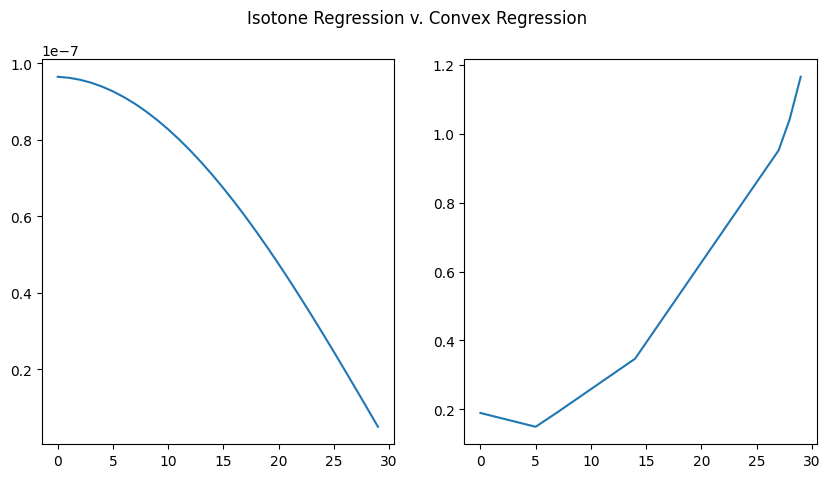

In [48]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(xIso)

plt.subplot(1, 2, 2)
plt.plot(xConv)

plt.suptitle(r"Isotone Regression v. Convex Regression")
plt.show()

![M](img/Solution-1.png)

![M](img/Solution-2.png)